# Course Project- Coding Artifact

## Data Preprocessing
The following section contains our analysis of the dataset we are using for this project. The dataset we are using is TripAdvisor Hotel Reviews found on Kaggle.com.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
# Load the data
data = pd.read_csv("tripadvisor_hotel_reviews.csv")

# Print data shape
print(data.shape)

# Show the first five rows
data.head(5)

(20491, 2)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [52]:
#Check the count, types of the data we have, and memory usage
data.info()

#Show the distribution of the ratings labels
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [15]:
# Check if there is any na values in data
data.isna().sum()

Review    0
Rating    0
dtype: int64

In [18]:
#Split the reviews (data to evaluate) from the ratings (labels)
X = data["Review"]
y = data["Rating"]

In [36]:
#Split the data into a training and a test set; random_state=42 for consistency
X_training, X_test, y_training, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=42)

#Split the training set into a dev and training set?
#X_train, X_dev, y_train, y_dev = train_test_split(X_training, y_training, shuffle=True, test_size=0.25, random_state=24)

In [37]:
#Print the shape of the training data we just split
print(X_train.shape)
print(y_train.shape)

(14343,)
(14343,)


In [38]:
def get_rating_dist(y_dist):
    """
    :param y_dist: The star ratings, aka the labels for the desired dataset
    :return: An array containing the distribution of the star ratings from 1-5 (index 0-4 respectively)
    
    This function takes in the vector of labels for a dataset and calculates the counts for the 5 different
    star rating labels, returning that list of counts.
    """
    rating_dist = [0, 0, 0, 0, 0]  #List of star rating counts
    #For each label in y_dist, add a count to rating_dist for the designated rating
    for y in y_dist:
        rating_dist[y-1] += 1
    return rating_dist  #Return the distribution

In [39]:
#Call get_rating_dist on the training set labels
train_ratings = get_rating_dist(y_train)

Text(0, 0.5, 'Counts')

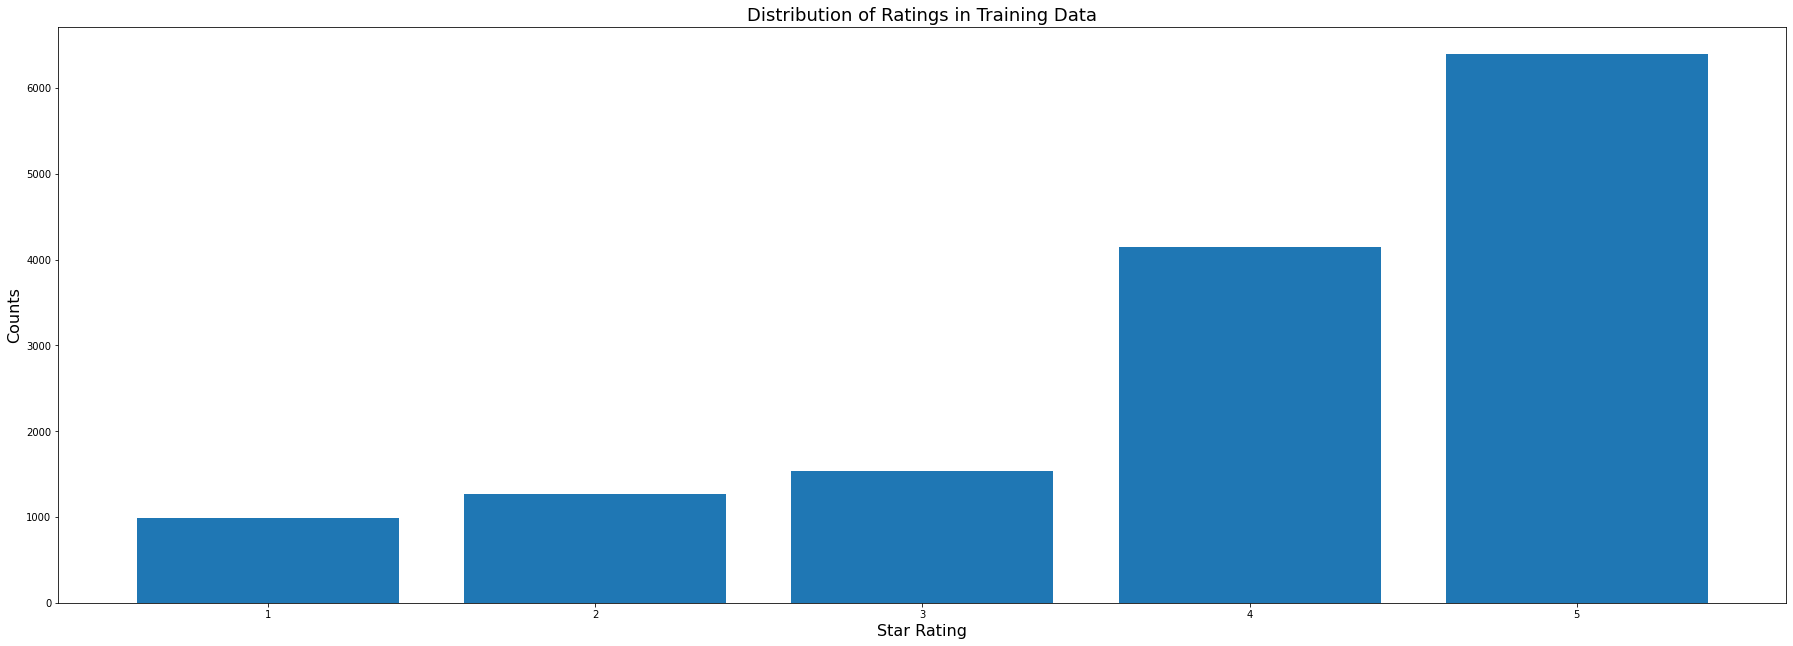

In [40]:
#Plot the distribution of star ratings in the training data
fig = plt.figure(figsize=(24,8))
ax = fig.add_axes([0,0,1,1])
rating_labels = ['1', '2', '3', '4', '5']
ax.bar(rating_labels, train_ratings)

plt.title('Distribution of Ratings in Training Data', fontsize=18)
plt.xlabel('Star Rating', fontsize=16)
plt.ylabel('Counts', fontsize=16)

In [50]:
#Output all of the reviews in the training set into a file to see what the reviews look like
with open("train_reviews.txt", 'w', encoding="utf-8") as sentence_file:
    for review in X_train:
        sentence_file.write(review + '\n')

In [48]:
def avg_word_count(X_dist):
    """
    :param X_dist: The array containing the reviews from the given dataset
    :return: The average word count for all of the reviews in the given dataset
    
    This function takes in the array containing a set of reviews without the labels, calculates
    the total number of words over all of the reviews, and returns the average word count per review.
    """
    total_count = 0
    for review in X_dist:
        words_arr = review.split()
        total_count += len(words_arr)
    return (total_count/len(X_dist)) 

In [49]:
print("The average word count for the training data reviews is", avg_word_count(X_train))

The average word count for the training data reviews is 104.4727044551349
